# Tools

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from dash import Dash,Input, Output, State, dcc, html
from jupyter_dash import JupyterDash

# Reading data

In [2]:
df = pd.read_csv("realstate_data-v1.csv")
df

,index,date_added,latitude,longitude,country,city,rooms,bedrooms,bathrooms,area,price,property_type,page_url,purpose
0,0,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,7.0,7.0,2.0,140.00000,153000.0,Department,www.kaggle.com,For Sale
1,1,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,2.0,1.0,2.0,70.00000,159000.0,Penthouse,www.kaggle.com,For Sale
2,2,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,1.0,45.00000,125000.0,Penthouse,www.kaggle.com,For Sale
3,3,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,1.0,85.00000,295000.0,Penthouse,www.kaggle.com,For Sale
4,4,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,50.00000,40000.0,Penthouse,www.kaggle.com,For Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338048,191388,2019-07-24,33.668497,73.074160,Pakistan,Islamabad,1.0,3.0,0.0,313.63196,252.0,Upper Portion,www.zameen.com,For Rent
338049,191389,2019-07-24,33.668497,73.074160,Pakistan,Islamabad,7.0,2.0,0.0,313.63196,144.0,Upper Portion,www.zameen.com,For Rent
338050,191390,2019-07-24,33.676104,73.013842,Pakistan,Islamabad,1.0,6.0,6.0,505.85700,576.0,House,www.zameen.com,For Rent
338051,191391,2019-07-24,33.527944,73.161392,Pakistan,Islamabad,4.0,2.0,2.0,68.29083,90.0,Flat,www.zameen.com,For Rent


In [3]:
#df["date_added"] = pd.to_datetime(df["date_added"])
#px.bar((df["date_added"].dt.month.value_counts()),title="Data gathered in times")

_________________

## Business layer

### map plot

In [4]:
def plot_map(plot_mask):
    if plot_mask == "0 - 100k $":
        
        mask = df["price"].between(0,100_000)
            
    elif plot_mask == "100k - 200k $":

        mask=df["price"].between(100_000,200_000)
        
    elif plot_mask == "200k - 500k $":

        mask=df["price"].between(200_000,500_000)

    elif plot_mask == "500k - 1Mil $":
        
        mask=df["price"].between(500_000,1e6)

    elif plot_mask == "1Mil - 5Mil $":

        mask = df["price"].between(1e6,5e6)

    elif plot_mask == "5Mil - 10Mil $":

        mask = df["price"].between(5e6,10e6)

    elif plot_mask == "10Mil - 20Mil $":

        mask = df["price"].between(10e6,20e6)

    elif plot_mask == "20Mil - More $":

        mask = df["price"]>=20e6

    fig = px.scatter_mapbox(data_frame=df[mask],
                            lat="latitude",lon="longitude",
                            mapbox_style="open-street-map",
                            color="purpose",hover_data=["price","property_type"],zoom=1)

    return fig

### hist plot

In [5]:
def plot_hist(country):
    if country == "Argentina":
        mask = df["country"]=="Argentina"
    elif country == "Pakistan":
        mask = df["country"]=="Pakistan"
        
    fig = px.histogram(data_frame=df[mask]["price"])
    fig.update_layout(xaxis_title="Range of prices",yaxis_title="Count",showlegend=False)
    
    return fig

### Bar plot

In [6]:
def plot_bar(country):
    if country == "Argentina":
        mask = df["country"]=="Argentina"
    elif country == "Pakistan":
        mask = (df["country"]=="Pakistan")&(df["purpose"]=="For Sale")
    else:
        mask=df.columns
        
    fig = px.bar((df[mask]["property_type"]).value_counts(),color=((df[mask]["property_type"]).value_counts()).index)
    fig.update_layout(xaxis_title="property types",yaxis_title="Count")    
    
    return fig

In [7]:
def stakeholder_bar():
    fig = px.bar(df["page_url"].value_counts(),title="data source",color=df["page_url"].value_counts().index)
    fig.update_layout(xaxis_title="Source",yaxis_title="Count")
    return fig

In [8]:
def stakeholder_time_data():
    df["date_added"] = pd.to_datetime(df["date_added"])
    segment = df["date_added"]
    fig = px.bar(segment.value_counts(),title="Data gathered in times")
    fig.update_layout(xaxis_title="Time",yaxis_title="Count")
    return fig

## Application and presentational layer of the web page

In [9]:
app = JupyterDash(__name__)

app.layout = html.Div(
    [
        html.Div([html.H1("Decision support application (real state)"),
        html.Img(src="https://user-images.githubusercontent.com/59618586/236200762-55055a25-bd3f-4b21-b292-674164f9db67.jpg")]),
        
        html.Br(),
        html.H3("choose range of prices"),
        dcc.Dropdown(
            options=["0 - 100k $","100k - 200k $","200k - 500k $",
                     "500k - 1Mil $","1Mil - 5Mil $","5Mil - 10Mil $","10Mil - 20Mil $","20Mil - More $"],
            value="0 - 100k $",
            id="demo-plots-dropdown",
        ),
        html.Div(dcc.Graph(id="demo-plot-display")),
        html.Br(),
        
        html.H1("Histogram"),
        html.H3("choose a country"),
        dcc.Dropdown(
            options=["Argentina","Pakistan"],
            value="Argentina",
            id="hist-dropdown"
        ),
        html.Div(dcc.Graph(id="hist-display")),
        html.Br(),
        
        html.H3("Average prices of real state being sold in Argentina"),
        html.H4("241221.080 $"),
        html.H3("Average prices of real state being sold in Pakistan"),
        html.H4("89048.779 $"),
        html.H3("Average prices of real state being rented in Pakistan"),
        html.H4("328.091 $"),
        html.Br(),
        
        html.H1("bar plot of real state types"),
        html.H3("choose a country"),
        dcc.Dropdown(
            options=["Argentina","Pakistan","Overall"],
            value="Argentina",
            id="bar-dropdown"
        ),
        html.Div(dcc.Graph(id="bar-display")),
        html.Hr(),
        
        html.H1("Stakeholder Data prespection"),
        html.H2("data source"),
        html.Div([dcc.Graph(figure=stakeholder_bar())]),
        
        html.Br(),
        html.H2("data gathering in times"),
        html.Div([dcc.Graph(figure=stakeholder_time_data())])])
        


@app.callback(Output("demo-plot-display","figure"),Input("demo-plots-dropdown","value"))
def display_demo_graph(plot_mask):
    
    fig = plot_map(plot_mask)
    
    return fig

@app.callback(Output("hist-display","figure"),Input("hist-dropdown","value"))
def diplay_hist(country):
    fig = plot_hist(country)
    
    return fig

@app.callback(Output("bar-display","figure"),Input("bar-dropdown","value"))
def diplay_hist(country):
    fig = plot_bar(country)
    
    return fig

### Hosting locally

In [10]:
hostt = app.run_server(mode="external")

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


### hosting globally

In [11]:
from pyngrok import ngrok
http_tunnel = ngrok.connect("http://127.0.0.1:8050/")

t=2023-05-10T12:01:38+0200 lvl=warn msg="ngrok config file found at legacy location, move to XDG location" xdg_path=C:\\Users\\ahmed\\AppData\\Local/ngrok/ngrok.yml legacy_path=C:\\Users\\ahmed\\.ngrok2\\ngrok.yml


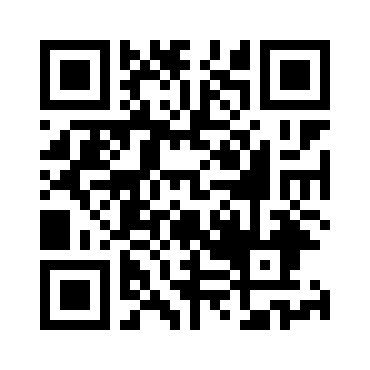

In [12]:
import qrcode
qrcode.make(http_tunnel.public_url)

In [13]:
http_tunnel.public_url

'https://de07-196-132-47-230.ngrok-free.app'